In [45]:
import pandas as pd

# Specify the path to your CSV file
csv_file_path = '/Users/adahanyigitol/Desktop/CS210/ benim.csv'

try:
    # Read only the necessary columns (2nd, 11th, 12th, and 15th) from the CSV file
    columns_to_read = [1, 10, 11, 14]  # 0-based index
    
    column_to_read_genre = [1,5]

    # Use the read_csv function to create a DataFrame, skip the first column
    df = pd.read_csv(csv_file_path, usecols=columns_to_read, header=0)
    
    gdf = pd.read_csv(csv_file_path, usecols=column_to_read_genre, header=0)

    # Rename the columns for better clarity
    df.columns = ['Song Name', 'Dance Values', 'Energy Values', 'Happiness']

    gdf.columns = ['Song Name', 'Genre']
    # Fill NaN (empty) values with 0
    df = df.fillna(0)
    gdf = gdf.fillna(0)

    # Display the resulting DataFrame
    #print(df)
    print(gdf)

except FileNotFoundError:
    print(f"Error: The file '{csv_file_path}' could not be found.")
except Exception as e:
    print(f"An error occurred: {e}")


              Song Name                                              Genre
0        Basic Instinct                                 organic electronic
1               Breathe                          indie anthem-folk, uk pop
2    i was all over her  countrygaze, lo-fi emo, lo-fi indie, pov: indi...
3         Try Hard Fool  garage rock revival, indie garage rock, indie ...
4                  Pyro                                  modern rock, rock
..                  ...                                                ...
336      IV. Sweatpants                          atl hip hop, hip hop, rap
337   I. The Worst Guys  atl hip hop, hip hop, rap, chicago rap, consci...
338                 N95    conscious hip hop, hip hop, rap, west coast rap
339        Count Me Out    conscious hip hop, hip hop, rap, west coast rap
340             Alright    conscious hip hop, hip hop, rap, west coast rap

[341 rows x 2 columns]


In [30]:
## DANCE VALUE SCALE: 0-100
## ENERGY VALUE SCALE: 0-100
## HAPPINESS VALUE SCALE: 0-100


,Song Name,Dance Values,Energy Values,Happiness
0,Basic Instinct,74,47,33
1,Breathe,41,38,7
2,i was all over her,53,35,6


In [51]:
from collections import Counter

gdf['Genre'] = gdf['Genre'].astype(str)

# Assuming your DataFrame is named 'df' and the genres are in the first column
# Replace 'YOUR_COLUMN_NAME' with the actual name of your first column

# Create a Counter to count genre occurrences
genre_counter = Counter()

# Iterate over each row in the DataFrame
for index, row in gdf.iterrows():
    # Split the genres in the current row (assuming they are comma-separated)
    genres = row['Genre'].split(', ')

    # Update the genre_counter with the genres in the current row
    genre_counter.update(genres)

# Find the most common genre
most_common_genre = genre_counter.most_common(1)[0][0]

print(f"The most common genre of your songs is: {most_common_genre}")


The most common genre is: modern rock


Temperature: 15.01 °C
Weather Description: scattered clouds
Wind Speed: 2.06 m/s
Humidity: 77%
Cloudiness: 40%


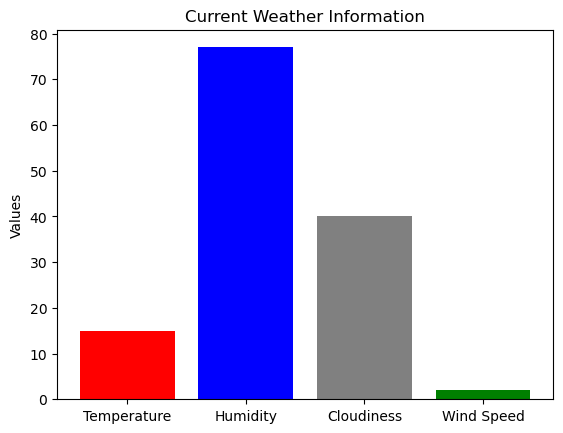

In [37]:
import requests
import matplotlib.pyplot as plt

# Replace 'YOUR_API_KEY' with your OpenWeatherMap API key
api_key = 'ac7c2c857a99c83a3653bbdb3be5ba50'
lat = 41.0082
lon = 28.9784

# API endpoint URL for current weather
url = f'https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={api_key}'

# Make the API request
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the JSON response
    weather_data = response.json()

    temperature_kelvin = weather_data['main']['temp']
    weather_description = weather_data['weather'][0]['description']
    wind_speed = weather_data['wind']['speed']
    humidity = weather_data['main']['humidity']
    clouds = weather_data['clouds']['all']

    # Convert temperature from Kelvin to Celsius
    temperature_celsius = temperature_kelvin - 273.15

    # Print the weather information
    print(f"Temperature: {temperature_celsius:.2f} °C")
    print(f"Weather Description: {weather_description}")
    print(f"Wind Speed: {wind_speed} m/s")
    print(f"Humidity: {humidity}%")
    print(f"Cloudiness: {clouds}%")

    # Bar graph
    features = ['Temperature', 'Humidity', 'Cloudiness', 'Wind Speed']
    values = [temperature_celsius, humidity, clouds, wind_speed]

    plt.bar(features, values, color=['red', 'blue', 'gray', 'green'])
    plt.title('Current Weather Information')
    plt.ylabel('Values')
    plt.show()

else:
    print(f"Failed to fetch weather data. Status code: {response.status_code}")


In [38]:
import folium

# Create a folium map centered at the specified latitude and longitude
weather_map = folium.Map(location=[lat, lon], zoom_start=10)

# Add a CircleMarker representing the location with popup information
folium.CircleMarker(
    location=[lat, lon],
    radius=10,
    popup=f'Temperature: {temperature_celsius} K\nHumidity: {humidity}%\nCloudiness: {clouds}%\nWind Speed: {wind_speed} m/s',
    color='blue',
    fill=True,
    fill_color='blue'
).add_to(weather_map)

# Add a marker for the location with a popup displaying weather information

# Save the map as an HTML file or display it in a Jupyter notebook
weather_map.save('weather_map.html')

from IPython.display import IFrame

# Open the generated HTML file in an iframe within the Jupyter Notebook
IFrame(src='weather_map.html', width=700, height=600)


 If the temperature would be below 0°C -> Number of songs: 41

 If the temperature would be between 0°C-20°C  -> Number of songs: 253

 If the temperature would be above 20°C -> Number of songs: 47


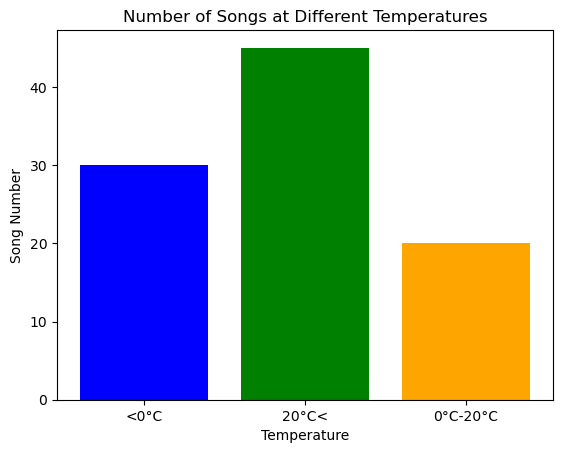

In [95]:
# This is the part where songs get filtered according to the weather condition of the current day of the user.
# A new filtering alogrithm will be applied which is the addition of the features 'Energy Values', 'Happiness', 'Dance Values' will be used.
# The range of this scale will be between 0 and 300 since each element has a max value of 100
# If the current temperature of the day is below 0 the songs that have addition between 0 and 100 will be chosen
# If the current temperature of the day is between 0 and 20 the songs that have addition between 100 and 200 will be chosen
# If the current temperature of the day is above 20 the songs that have addition above 200 will be chosen
#

# Assuming you have a DataFrame named 'df' with columns like "Song Name", "Temperature_Celsius", "Danceability", "Instrumentalness", "Energy"
# Replace this with your actual DataFrame
# For demonstration purposes, I'm creating a sample DataFrame

# Function to filter songs based on temperature and the sum of specified features
def filter_songs(temperature_celsius, df):
    if temperature_celsius < 0:
        return df[(df['Dance Values'] + df['Energy Values'] + df['Happiness']).between(0, 100)]
    elif 0 <= temperature_celsius <= 20:
        return df[(df['Dance Values'] + df['Energy Values'] + df['Happiness']).between(100, 200)]
    else:
       return df[(df['Dance Values'] + df['Energy Values'] + df['Happiness']).between(200, 300)]

new_temp1 = -5 # A chosen temperature below 0°C to see the number of convenient songs the user has for this temperature
new_temp3 = 15 # A chosen temperature between 0°C - 20°C to see the number of convenient songs the user has for this temperature
new_temp2 = 25 # A chosen temperature above 20°C to see the number of convenient songs the user has for this temperature
filtered1_songs = filter_songs(new_temp1, df)
# Print the number of songs in filtered_songs
num_songs1 = len(filtered1_songs)
print(f"\n If the temperature would be below 0°C -> Number of songs: {num_songs1}")

filtered3_songs = filter_songs(new_temp3, df)
# Print the number of songs in filtered_songs
num_songs3 = len(filtered3_songs)
print(f"\n If the temperature would be between 0°C-20°C  -> Number of songs: {num_songs3}")


filtered2_songs = filter_songs(new_temp2, df)
# Print the number of songs in filtered_songs
num_songs2 = len(filtered2_songs)
print(f"\n If the temperature would be above 20°C -> Number of songs: {num_songs2}")


def create_bar_graph():
    # Example values, replace with your actual data
    num_songs1 = 30
    num_songs2 = 45
    num_songs3 = 20

    # Temperature categories and corresponding values
    temperatures = ['<0°C', '20°C<', '0°C-20°C']
    song_numbers = [num_songs1, num_songs2, num_songs3]

    # Create a bar graph
    plt.bar(temperatures, song_numbers, color=['blue', 'green', 'orange'])

    # Add labels and title
    plt.xlabel('Temperature')
    plt.ylabel('Song Number')
    plt.title('Number of Songs at Different Temperatures')

    # Show the bar graph
    plt.show()

# Call the function to generate the bar graph
create_bar_graph()
 


In [94]:
def most_listenable_temperature(num_songs1, num_songs2, num_songs3):
    maxTemp = max(num_songs1, num_songs2, num_songs3)
    
    if maxTemp == num_songs1:
        print('Your songs are most listenable for temperatures below 0°C.')
    elif maxTemp == num_songs2:
        print('Your songs are most listenable for temperatures above 20°C.')
    else:
        print('Your songs are most listenable for temperatures between 0°C and 20°C.')
        
most_listenable_temperature(num_songs1, num_songs2, num_songs3)

Your songs are most listenable for temperatures between 0°C and 20°C.


In [92]:
# Filter songs based on temperature_celsius
filtered_songs = filter_songs(temperature_celsius, df)

# Print only the song names in filtered_songs
print(f"Songs for the current temperature of={temperature_celsius}°C :\n\n", filtered_songs['Song Name'].tolist())

# Print the number of songs in filtered_songs
num_songs = len(filtered_songs)
print(f"\nNumber of the convenient songs: {num_songs}")

Songs for the current temperature of=15.010000000000048°C :

 ['Basic Instinct', 'Try Hard Fool', 'Pyro', 'Myth', 'Space Song', 'The Good Side', 'Sleep Forever', 'midnight love', 'Ivy', 'Falling Down - Bonus Track', 'Liability', 'Take Care', 'Telescope', 'Migraine', 'Bored', '505', 'High By The Beach', 'Everybody', 'Please, Please, Please, Let Me Get What I Want - 2011 Remaster', 'Taking Pictures Of You', 'Dark Paradise', 'Wires', 'Pretty When You Cry', 'Heaven', 'So It Goes', 'Come a Little Closer', 'Everytime', 'Bunker', 'Surf', 'Woods', 'Good News', 'Location', 'Share with Me the Sun', 'Drew Barrymore', 'Good Days', 'Dark Necessities', 'All the Pretty Girls', 'Don’t Delete The Kisses', 'California', 'Brooklyn Baby', 'Sweater Weather', 'Aquarium', 'Naive', "16 / 04 / 16 (Jack's Song)", '18 Dollars', '2009', "You're Somebody Else", 'Softcore', 'Habits (Stay High)', 'Bloom Later', 'Warned You', 'First Love / Late Spring', 'American Honey', 'Heavenly', 'Sunsetz', 'Sadderdaze', 'Without 

In [93]:
# Now we will do more filtering for extreme conditions of humidity, cloudiness
# If the cloudiness percentage is below 50% we will do more filtering on the chosen songs which will only look
# for the songs that have dance values above 50.
# If the humidity percentage is above 70% we will do more filtering on the chosen songs which will only look
# for the songs that have happiness values below 50 since there's a higher chance that it may be a rainy day.

def filter_cloudiness(clouds, filtered_songs):
    return filtered_songs[(filtered_songs['Dance Values']).between(50, 100)]
                           

# Assuming 'filtered_songs' is your DataFrame with 'Dance Values' column
# Replace with your actual DataFrame name
phase_status = 0

if clouds < 50:
    phase_status = 1
    print('Since the cloudiness of the weather is below 50% more filtering will be applied on the chosen songs:\n\n')
    filtered_phase1 = filter_cloudiness(clouds, filtered_songs)
    print(filtered_phase1['Song Name'].tolist())
    print('\n\n')
    print(f"Number of the convenient songs: {len(filtered_phase1)}")
else: 
    print('Since there is no extreme condition for the cloudiness of the weather more filtering will not be applied')
  
    

Since the cloudiness of the weather is below 50% more filtering will be applied on the chosen songs:


['Basic Instinct', 'Try Hard Fool', 'Space Song', 'Sleep Forever', 'Ivy', 'Falling Down - Bonus Track', 'Liability', 'Take Care', 'Telescope', 'Migraine', 'Bored', '505', 'High By The Beach', 'Everybody', 'Taking Pictures Of You', 'Dark Paradise', 'Wires', 'Pretty When You Cry', 'Heaven', 'So It Goes', 'Bunker', 'Surf', 'Woods', 'Good News', 'Location', 'Share with Me the Sun', 'Drew Barrymore', 'Dark Necessities', 'Don’t Delete The Kisses', 'Sweater Weather', 'Aquarium', "16 / 04 / 16 (Jack's Song)", '18 Dollars', '2009', "You're Somebody Else", 'Softcore', 'Habits (Stay High)', 'Bloom Later', 'Warned You', 'Heavenly', 'Sadderdaze', 'Without You', 'Goner', 'Beautiful People Beautiful Problems (feat. Stevie Nicks)', 'Fear', 'Olive Juice', 'Flawless', 'I Love You So', 'Fancy Shoes', 'White Winter Hymnal', 'Reflections', 'Back to the Old House - 2011 Remaster', 'Love Hurts - 2007 Remast

In [91]:
def filter_humidity(humidity, filtered_phase2):
    return filtered_phase2[(filtered_phase2['Happiness']).between(0, 50)]

if phase_status == 1:
    if humidity > 70:
        print('Since the humidity of the weather is above 70% more filtering will be applied on the chosen songs:\n\n')
        filtered_phase2 = filter_humidity(humidity, filtered_phase1)
        print(filtered_phase2['Song Name'].tolist())
        print('\n\n')
        print(f"Number of the songs: {len(filtered_phase2)}") 
    else: 
        print('Since there is no extreme condition for the humidity of the weather more filtering will not be applied')
  
        
else:
    if humidity > 70:
        print('Since the humidity of the weather is above 70% more filtering will be applied on the chosen songs:\n\n')
        filtered_phase2 = filter_humidity(humidity, filtered_songs)
        print(filtered_phase2['Song Name'].tolist())
        print('\n\n')
        print(f"Number of the convenient songs: {len(filtered_phase2)}") 
    else: 
        print('Since there is no extreme condition for the humidity of the weather more filtering will not be applied')
  
  


Since the humidity of the weather is above 70% more filtering will be applied on the chosen songs:


['Basic Instinct', 'Try Hard Fool', 'Sleep Forever', 'Ivy', 'Falling Down - Bonus Track', 'Liability', 'Take Care', 'Telescope', 'Migraine', 'Bored', '505', 'High By The Beach', 'Everybody', 'Dark Paradise', 'Wires', 'Pretty When You Cry', 'Heaven', 'So It Goes', 'Bunker', 'Surf', 'Woods', 'Good News', 'Location', 'Drew Barrymore', 'Dark Necessities', 'Don’t Delete The Kisses', 'Sweater Weather', 'Aquarium', "16 / 04 / 16 (Jack's Song)", '18 Dollars', '2009', "You're Somebody Else", 'Softcore', 'Habits (Stay High)', 'Bloom Later', 'Warned You', 'Heavenly', 'Sadderdaze', 'Goner', 'Beautiful People Beautiful Problems (feat. Stevie Nicks)', 'Olive Juice', 'Flawless', 'I Love You So', 'Back to the Old House - 2011 Remaster', 'Alleyways', '400 Lux', 'Leaving Tonight', 'You Get Me So High', 'Call It Fate, Call It Karma', 'Sweetie Little Jean', 'Ghosting', 'When You Were Made', 'Nervous', 'Fra